In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import scipy as sp
import matplotlib as mpl
import seaborn as sns

# Setting up Pandas
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

# Setting up Seaborn
sns.set_style("whitegrid")
#sns.set_context("poster")

%matplotlib inline

In [2]:
train = pd.read_csv('training_data.csv')
test = pd.read_csv('test_data.csv')

In [3]:
training = train.drop('status_group', axis=1)

In [4]:
training = training.drop('Unnamed: 0', axis=1)

test = test.drop('Unnamed: 0', axis=1)

In [5]:
##Plot function for Confusion Matrix

#plt.rcParams['figure.figsize'] = (6.0, 6.0)
from sklearn.metrics import confusion_matrix
labels=['functional','functional needs repair','non functional']
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(shrink=0.7)
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45, ha='right', fontsize=12)
    plt.yticks(tick_marks, labels , fontsize=12)
    plt.tight_layout()
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)

## Because we are having maximum amount of Categorical data let us transform the features, and convert them into list

In [6]:
def transform_feature(df, column_name):
    unique_values = set(df[column_name].tolist())
    transformer_dict = {}
    for index, value in enumerate(unique_values):
        transformer_dict[value] = index
    df[column_name] = df[column_name].apply(lambda y: transformer_dict[y])
    return df

In [7]:
integer_columns = ['days_since_recorded', 'population'] 
columns_to_transform = [col for col in training.columns if col not in integer_columns]
for column in columns_to_transform: 
    training = transform_feature(training, column)
    test = transform_feature(test, column)

## Now That we have Cleaned our dataset and Transformed our features, let us train our Model.

In [8]:
## Converting the Training dataframe into a matrix and predictor as y 
X = training.as_matrix()
y = train["status_group"].tolist()

> Splitting the Data Set with features into Train set  and Test set to train our model.

In [9]:
import sklearn.model_selection 
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, 
                                                                             y, 
                                                                             test_size = 0.3, 
                                                                             random_state = 0)

> As a part of EDA let us traing the data using different algorithms and findout which give us the better result.

## Random Forest Classifier

In [10]:
import sklearn.ensemble

rfc = sklearn.ensemble.RandomForestClassifier(n_estimators=1000, 
                                              min_samples_split=6,
                                              criterion='gini', 
                                              max_features='auto',
                                              oob_score=True,
                                              random_state=1,
                                              n_jobs=-1)

In [11]:
rfc.fit(X_train, y_train)

print('Random Forest Classifier Train Accuracy Score :', rfc.score(X_train, y_train))
print('Random Forest Classifier Test Score :', rfc.score(X_test, y_test))

Random Forest Classifier Train Accuracy Score : 0.905002405002
Random Forest Classifier Test Score : 0.795342312009


Confusion matrix
[[8519  179  914]
 [ 726  414  193]
 [1550   85 5240]]


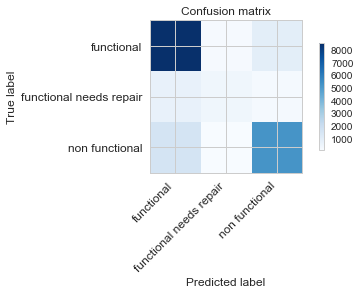

In [38]:
## Constructing the Confusion Matrix
cm = confusion_matrix(y_test, rfc.predict(X_test))
np.set_printoptions(precision=2)
print('Confusion matrix')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

## Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dtc = DecisionTreeClassifier(criterion='gini',
                            max_depth = 10,
                            max_features = 'auto',
                            random_state = 1,
                            splitter = 'best')

In [14]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

In [15]:
print("Train Score :", dtc.score(X_train, y_train))
print("Test Score :", dtc.score(X_test, y_test))

Train Score : 0.725853775854
Test Score : 0.712457912458


Confusion matrix
[[8848   45  719]
 [1042  103  188]
 [3078   52 3745]]


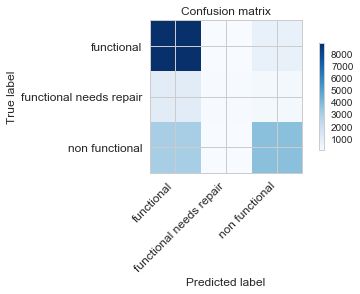

In [37]:
## Constructing the Confusion Matrix
cm = confusion_matrix(y_test, dtc.predict(X_test))
np.set_printoptions(precision=2)
print('Confusion matrix')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

## Extra Tree Classifier

In [16]:
from sklearn.ensemble import ExtraTreesClassifier

ETC = ExtraTreesClassifier(n_estimators=1000,min_samples_split=10)

In [17]:
ETC.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [18]:
print('Extra Tree Classifier Training Score :',ETC.score(X_train, y_train))
print('Extra Tree Classifier Test Score :',ETC.score(X_test, y_test))

Extra Tree Classifier Training Score : 0.889971139971
Extra Tree Classifier Test Score : 0.791582491582


Confusion matrix
[[8476  187  949]
 [ 719  414  200]
 [1575   84 5216]]


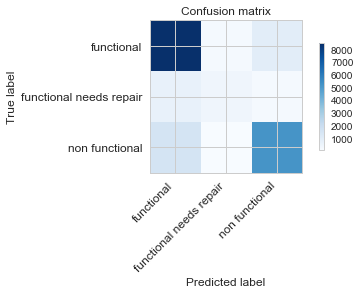

In [36]:
## Constructing the Confusion Matrix
cm = confusion_matrix(y_test, ETC.predict(X_test))
np.set_printoptions(precision=2)
print('Confusion matrix')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

## Linear Search CV

In [19]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [20]:
pipe = Pipeline([('scl', StandardScaler()), ('clf', LinearSVC())])

In [21]:
param_grid = {'clf__C':[0.01],
                      'clf__class_weight':[None]}

In [22]:
estimator = GridSearchCV(estimator=pipe,
                                 param_grid=param_grid,
                                 n_jobs=-1)

In [23]:
estimator.fit(training, train.status_group)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'clf__C': [0.01], 'clf__class_weight': [None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [24]:
#print(estimator.score(X_test,y_train))

estimator.score(training,train.status_group)

0.62900673400673401

## Gradient Boosting

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
param_test1 = {'n_estimators':range(20,81,10)}
estimator = GridSearchCV(estimator = GradientBoostingClassifier(), 
                         param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
estimator.fit(X_train, y_train)

In [ ]:
best_params = estimator.best_params_
print ('Best parameters are:',best_params)
                                 
val_accuracy = estimator.score(X_test, y_test)
print('Gridsearch Accuracy score: ', va1_accuracy)

Best parameters are: {'learning_rate': 0.075, 'max_depth': 7, 'max_features': 1.0, 'min_samples_leaf': 8, 'n_estimators': 200}

Gridsearch Accuracy score:  0.791189674523

## Predictions

In [26]:
predict = ETC.predict(test)

In [27]:
submission = pd.read_csv('SubmissionFormat.csv')

In [28]:
Final_merge = pd.concat([test, submission], axis=1)

In [29]:
Final_merge.head()

,amount_tsh,days_since_recorded,funder,installer,basin,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,payment_type,water_quality,quantity_group,source_type,source_class,waterpoint_type,waterpoint_type_group,id,status_group
0,0,302,5,5,1,321,0,3,0,5,6,5,4,1,4,0,6,5,50785,predicted label
1,0,302,4,0,0,300,0,2,0,2,1,5,4,4,3,1,1,1,51630,predicted label
2,0,305,5,5,1,500,0,2,2,5,6,5,4,4,4,0,6,5,17168,predicted label
3,0,315,5,5,5,250,2,2,0,4,6,0,4,2,1,1,6,5,45559,predicted label
4,65,251,5,5,5,60,2,5,0,2,1,4,4,3,3,1,1,1,49871,predicted label


In [30]:
Final_merge['status_group'] = predict

In [31]:
Final_merge[['id','status_group']].to_csv('submission.csv', index=False)

In [32]:
sub = pd.read_csv('submission.csv')

In [33]:
sub.head()

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
